In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_points = 1000
vectors_set = []
for i in xrange(num_points):
         x1= np.random.normal(0.0, 0.55)
         y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
         vectors_set.append([x1, y1])
 
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

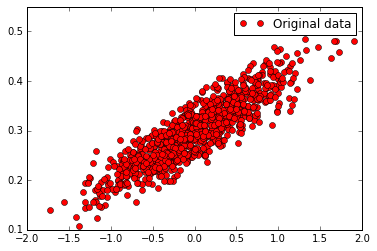

In [3]:
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.legend()
plt.show()

In [4]:
#the formula of the model 
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [5]:
#the model for optimization (this is for run)
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [6]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [7]:
losses = []
for step in xrange(8):
    sess.run(train)
    tl = sess.run(loss)
    losses.append(tl)
    print step, sess.run(W), sess.run(b), tl
    

0 [-0.11307935] [ 0.30242038] 0.0156606
1 [-0.04409283] [ 0.30157077] 0.00767242
2 [ 0.00269707] [ 0.30101436] 0.00399773
3 [ 0.03443202] [ 0.30063698] 0.00230732
4 [ 0.05595603] [ 0.300381] 0.00152971
5 [ 0.07055456] [ 0.30020741] 0.001172
6 [ 0.08045592] [ 0.30008966] 0.00100745
7 [ 0.08717145] [ 0.30000979] 0.000931749


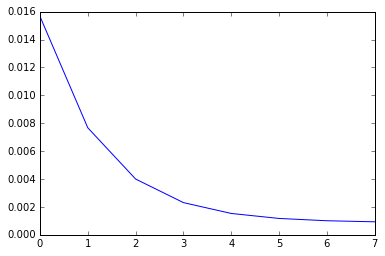

In [9]:
steps = range(0,8)
plt.plot(steps, losses)
plt.show()

/Users/jaimec/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


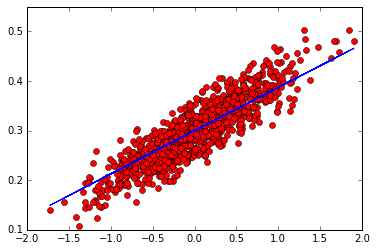

In [8]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.legend()
plt.show()